# Milk Grading System

## Importing Libraries

In [5]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing dataset

In [7]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/milk grading system files 2/Data/Milk Grading (1).csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


## Checking file size

In [8]:
data.shape

(1059, 8)

## Data Analysis & Cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 66.3 KB


## Checking for null values

In [10]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

## Statistical summery

In [11]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.418319
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.393934
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,0.500000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,0.500000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000


## Checking the datatypes of each column

In [12]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade         float64
dtype: object

In [13]:
data['Fat '].value_counts()

1    711
0    348
Name: Fat , dtype: int64

In [14]:
data['Grade'].value_counts()

0.0    429
0.5    374
1.0    256
Name: Grade, dtype: int64

In [15]:
data.loc[data['Grade']==0.0,'Grade'] = 'Bad'
data.loc[data['Grade']==0.5,'Grade']='Moderate'
data.loc[data['Grade']==1.0,'Grade']='Good'

In [16]:
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,Good
1,6.6,36,0,1,0,1,253,Good
2,8.5,70,1,1,1,1,246,Bad
3,9.5,34,1,1,0,1,255,Bad
4,6.6,37,0,0,0,0,255,Moderate
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,Moderate
1055,6.7,38,1,0,1,0,255,Good
1056,3.0,40,1,1,1,1,255,Bad
1057,6.8,43,1,0,1,0,250,Good


# data visualization

## Checking for correlation

In [17]:
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


## Heatmap

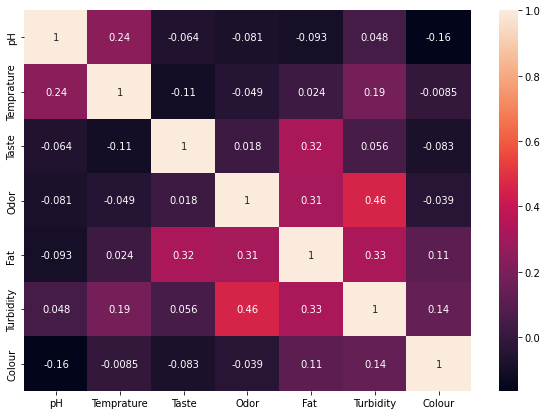

In [18]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(),annot=True)

## create hist

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f3eee490>,
      dtype=object)

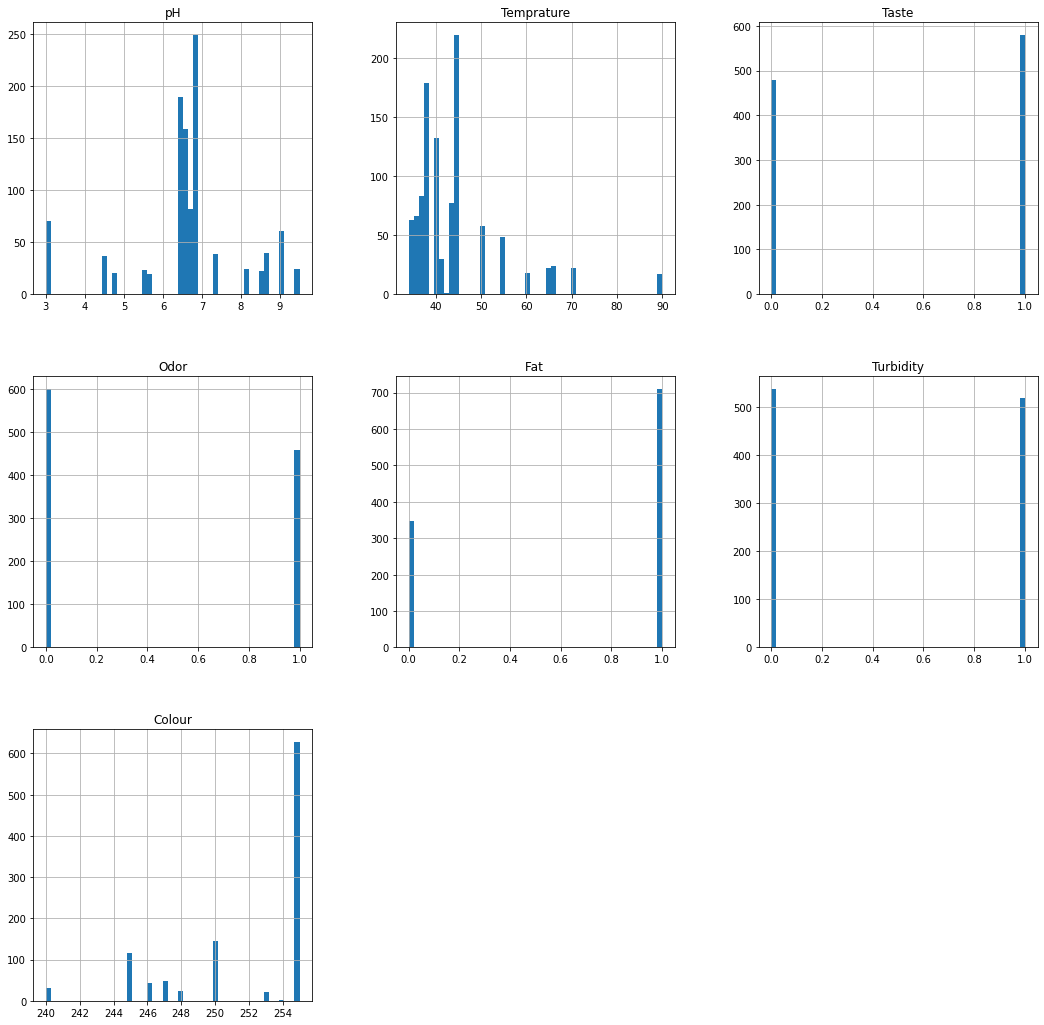

In [19]:
data.hist(bins=50, figsize=(18,18))

## create distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


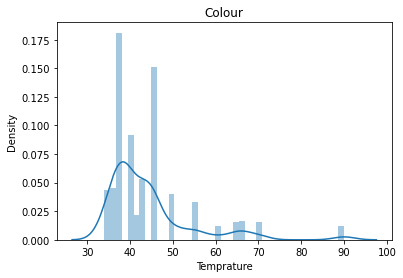

In [20]:
sns.distplot(data['Temprature'])
plt.title('Colour')
plt.show()

## create countplot

In [21]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=data[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()

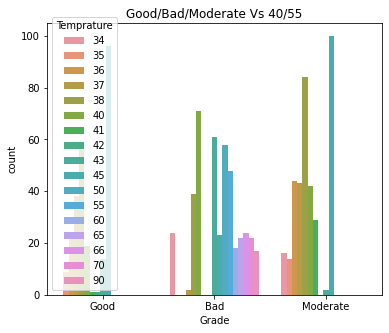

In [22]:
countplot_of_2('Grade','Temprature','Good/Bad/Moderate Vs 40/55')

## create swarmplot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


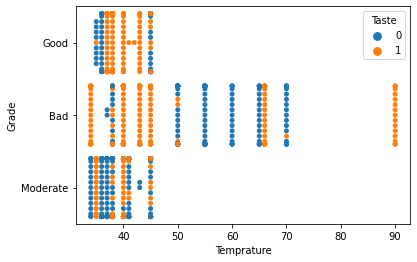

In [23]:
import seaborn as sns
sns.swarmplot(x="Temprature", y="Grade", hue="Taste", data=data)

## Pie diagram for Grade evaluation

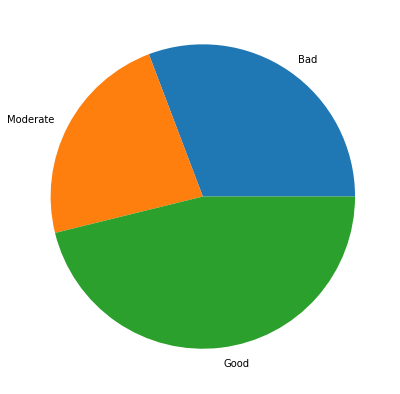

In [24]:
# Creating dataset
Grade = ['Bad', 'Moderate', 'Good']
 
cate = [20, 15, 30]
 
# Creating plot
fig = plt.figure(figsize =(11, 7))
plt.pie(cate, labels = Grade)
 
# show plot
plt.show()

## barplot for pH and Grade

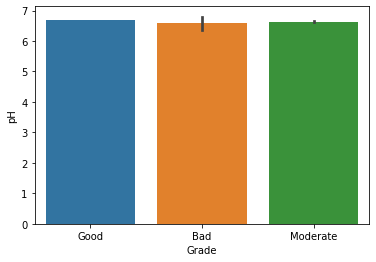

In [25]:
# create barplot Grade Vs pH
sns.barplot(x = 'Grade',
            y = 'pH',
            data = data)
 
# Show the plot
plt.show()

## boxplot for Colour and Grade

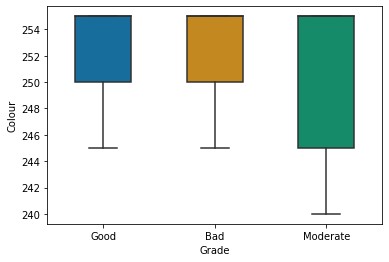

In [26]:
# create boxplot Colour Vs Grade
bplot = sns.boxplot(y='Colour', x='Grade', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

## scatterplot for Temprature and Grade

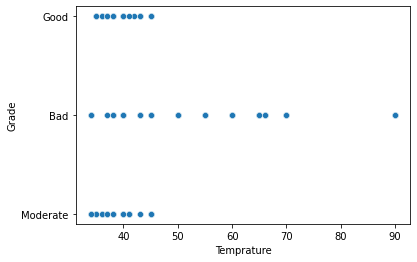

In [27]:
# create scatterplot Temprature Vs Grade

sns.scatterplot(data = data, x = "Temprature", y = "Grade")

plt.show()

## create scatterplot Odor Vs Grade

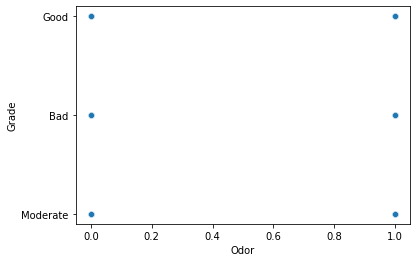

In [28]:
# create scatterplot Odor Vs Grade


sns.scatterplot(data = data, x = "Odor", y = "Grade")

plt.show()

## create pair plot

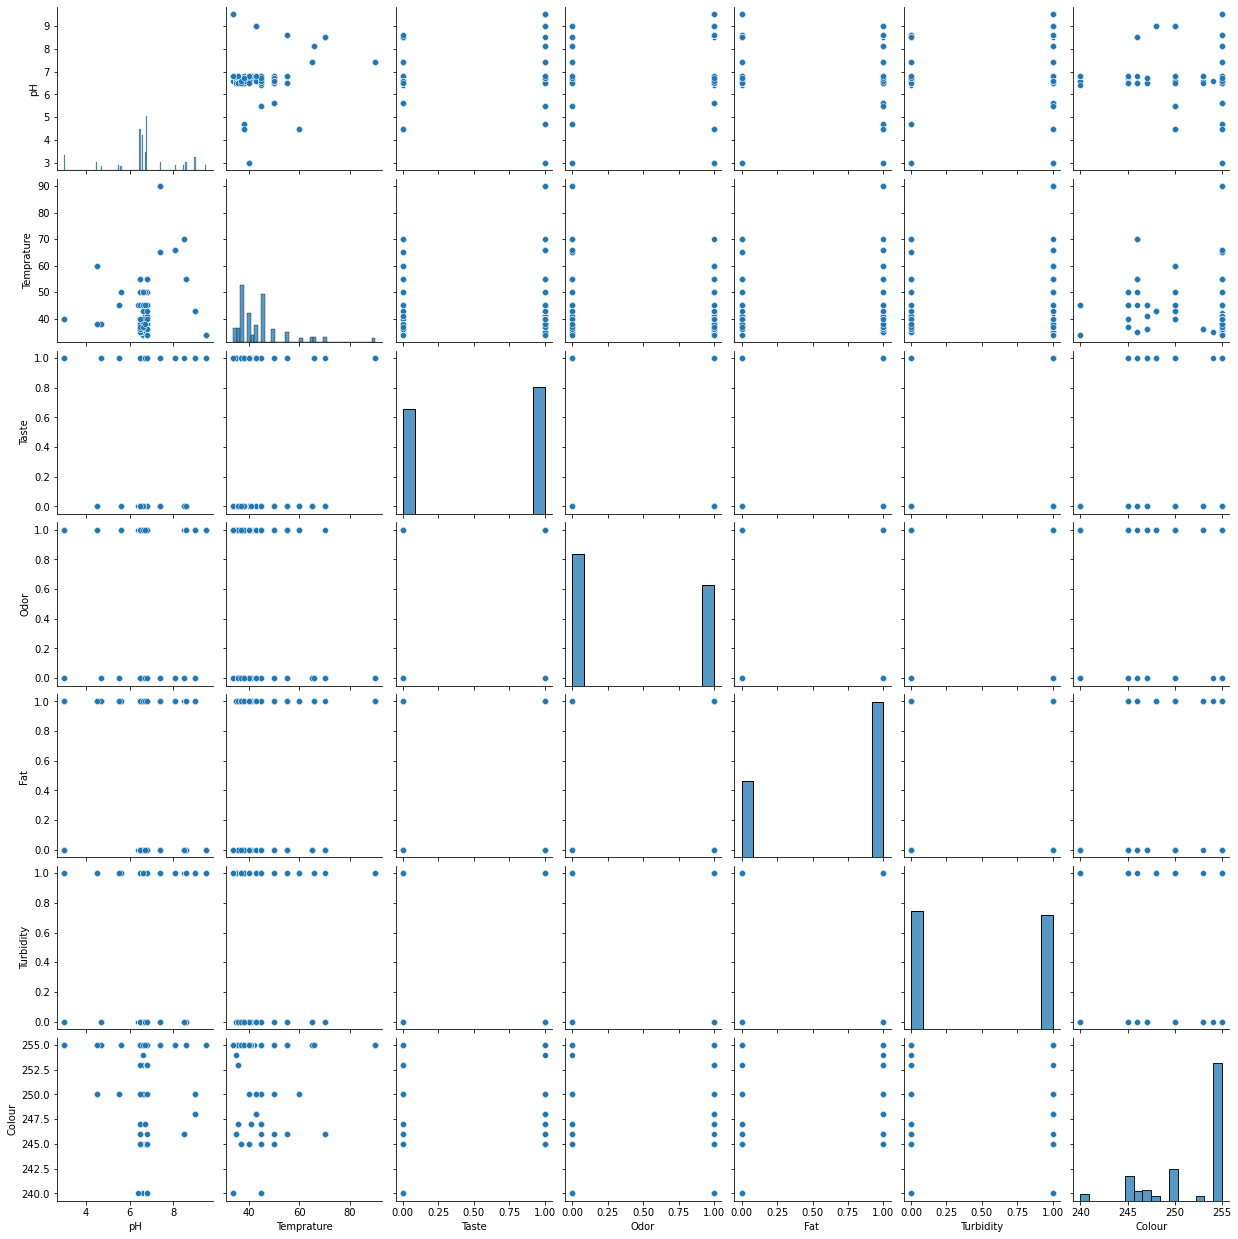

In [29]:
sns.pairplot(data)

## Detecting the Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


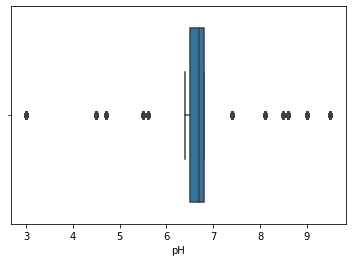

In [30]:
sns.boxplot(data['pH'])

In [31]:
#dividing the dataset into dependent and independent y and x respectively
y = data['Grade']
x = data.drop(columns=['Grade'],axis=1)

## Train test split¶

In [32]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

## over sampling

In [33]:
from imblearn import over_sampling

In [34]:
os = over_sampling.RandomOverSampler(random_state=0)

In [35]:
x,y = os.fit_resample(x,y)

In [36]:
y.value_counts()

Good        429
Bad         429
Moderate    429
Name: Grade, dtype: int64

In [37]:
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [38]:
y.tail()

1282    Moderate
1283    Moderate
1284    Moderate
1285    Moderate
1286    Moderate
Name: Grade, dtype: object

## model building

## 1. SupportVectorMachine Classifier

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict)
test_accuracy

0.5283018867924528

In [40]:
y_train_predict=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict)
train_accuracy

0.5560802833530106

In [41]:
pd.crosstab(y_test,y_predict)

col_0,Bad,Moderate
Grade,,
Bad,35,34
Good,0,66
Moderate,0,77


In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         Bad       1.00      0.51      0.67        69
        Good       0.00      0.00      0.00        66
    Moderate       0.44      1.00      0.61        77

    accuracy                           0.53       212
   macro avg       0.48      0.50      0.43       212
weighted avg       0.48      0.53      0.44       212



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Random Forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict1)
test_accuracy



0.9905660377358491

In [44]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy


1.0

In [45]:
pd.crosstab(y_test,y_predict1)

col_0,Bad,Good,Moderate
Grade,,,
Bad,68,0,1
Good,0,65,1
Moderate,0,0,77


In [46]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99        69
        Good       1.00      0.98      0.99        66
    Moderate       0.97      1.00      0.99        77

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



## 3. Decision tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict2)
test_accuracy


0.9905660377358491

In [48]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy


1.0

In [49]:
y

0           Good
1           Good
2            Bad
3            Bad
4       Moderate
          ...   
1282    Moderate
1283    Moderate
1284    Moderate
1285    Moderate
1286    Moderate
Name: Grade, Length: 1287, dtype: object

In [50]:
pd.crosstab(y_test,y_predict2)

col_0,Bad,Good,Moderate
Grade,,,
Bad,68,0,1
Good,0,65,1
Moderate,0,0,77


In [51]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99        69
        Good       1.00      0.98      0.99        66
    Moderate       0.97      1.00      0.99        77

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



## 4. ExtraTrees Classifier

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict3)
test_accuracy



0.9905660377358491

In [53]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy


1.0

In [54]:
pd.crosstab(y_test,y_predict3)

col_0,Bad,Good,Moderate
Grade,,,
Bad,68,0,1
Good,0,65,1
Moderate,0,0,77


In [55]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99        69
        Good       1.00      0.98      0.99        66
    Moderate       0.97      1.00      0.99        77

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



## Hyper parameter tuning using GridSearchCV

### Hyper parameter tuning using GridSearchCV for SVC



In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {
              "kernel":['linear', 'rbf', 'sigmoid'],"gamma":['scale', 'auto'],
              "break_ties":['bool', 'default=False']   
              }


In [58]:
from sklearn.model_selection import KFold
svc=SVC()
gdcv = GridSearchCV(estimator=svc,param_grid=parameters)

In [59]:
gdcv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'break_ties': ['bool', 'default=False'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [60]:
gdcv.best_params_

{'break_ties': 'bool', 'gamma': 'auto', 'kernel': 'rbf'}

In [61]:
from sklearn.metrics import accuracy_score
svc=SVC(kernel='rbf',gamma='auto',break_ties='bool')
svc.fit(x_train,y_train)
y_train_pred=svc.predict(x_train)
y_test_pred=svc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 0.961038961038961
test accuracy 0.9433962264150944


### Hyper parameter tuning using GridSearchCV for RFC

In [62]:
parameters={"n_estimators" : [2,5,10,15,20,25],
            "warm_start":['False'],"min_samples_split":[2],"criterion":['entropy'],"random_state":[111]
    }
        

In [63]:
rfc=RandomForestClassifier()
gdcv1 = GridSearchCV(estimator=rfc,param_grid=parameters)

In [64]:
gdcv1.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'min_samples_split': [2],
                         'n_estimators': [2, 5, 10, 15, 20, 25],
                         'random_state': [111], 'warm_start': ['False']})

In [65]:
gdcv1.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 5,
 'random_state': 111,
 'warm_start': 'False'}

In [66]:
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=5,warm_start='False',random_state=111)
rfc.fit(x_train,y_train)
y_train_pred=rfc.predict(x_train)
y_test_pred=rfc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 1.0
test accuracy 0.9905660377358491


### Hyper parameter tuning using GridSearchCV for ETC

In [67]:
parameters={"n_estimators":[2,5,10,15,20,25],"criterion":['entropy'],
            "min_samples_split":[2],
             "min_samples_leaf":[1],"random_state":[111]}

In [68]:
etc=ExtraTreesClassifier()
gdcv2 = GridSearchCV(estimator=etc,param_grid=parameters)

In [69]:
gdcv2.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [2, 5, 10, 15, 20, 25],
                         'random_state': [111]})

In [70]:
gdcv2.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 5,
 'random_state': 111}

In [71]:
from sklearn.metrics import accuracy_score
etc=ExtraTreesClassifier(min_samples_leaf=1,min_samples_split=2,n_estimators=5,criterion='entropy',random_state= 111)
etc.fit(x_train,y_train)
y_train_pred=etc.predict(x_train)
y_test_pred=etc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 1.0
test accuracy 0.9905660377358491


### Hyper parameter tuning using GridSearchCV for DTC

In [72]:
parameters={"criterion":['entropy'],
    "splitter":['best'],
    "min_samples_split":[2],"random_state":[111]}

In [73]:
dtc=DecisionTreeClassifier()
gdcv3 = GridSearchCV(estimator=dtc,param_grid=parameters)

In [74]:
gdcv3.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'min_samples_split': [2],
                         'random_state': [111], 'splitter': ['best']})

In [75]:
gdcv3.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'random_state': 111,
 'splitter': 'best'}

In [76]:
from sklearn.metrics import accuracy_score
dtc=DecisionTreeClassifier(splitter='best',min_samples_split=2,criterion='entropy', random_state=111)
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_train)
y_test_pred=dtc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 1.0
test accuracy 0.9905660377358491


In [77]:
import pickle
pickle.dump(svc,open('Milk.pkl','wb'))

In [78]:
pwd

'/content'